In [123]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Proyecto Final - Machine Learning
## Parte 1: Análisis Exploratorio y Preprocesamiento

**Estudiante:** Estanislao

**Objetivo:** Predecir características de vuelo a vela basándose en condiciones meteorológicas ERA5

## Setup Inicial

In [124]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Módulos del proyecto
from utils import *
from analisis_exploratorio import *
from visualizaciones import *
from preprocessing import *

# Setup plotting
setup_plotting_style()
vis_dir = create_visualization_directory()

# Configuración pandas
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", "{:.3f}".format)

print("Módulos cargados correctamente")

Módulos cargados correctamente


---
## 1. Carga de Datos

In [125]:
# Cargar dataset completo
df = load_dataset("data/processed/dataset_completo.csv")

print(f"\nShape: {df.shape}")
print(f"\nPrimeras filas:")
df.head()

Dataset cargado: 387 filas × 96 columnas

Shape: (387, 96)

Primeras filas:


,fecha,pilot,glider,competition_id,altura_max_m,altura_min_m,altura_despegue_m,altura_aterrizaje_m,ganancia_altura_m,rango_altura_m,duracion_min,duracion_horas,distancia_km,velocidad_promedio_kmh,lat_despegue,lon_despegue,hora_despegue,hora_despegue_decimal,num_gps_fixes,frecuencia_muestreo_seg,num_termicas,intensidad_termicas_mean_ms,intensidad_termicas_max_ms,intensidad_termicas_min_ms,intensidad_termicas_std_ms,altura_base_termicas_mean_m,altura_tope_termicas_mean_m,altura_base_termicas_min_m,altura_tope_termicas_max_m,ganancia_por_termica_mean_m,ganancia_por_termica_max_m,duracion_termica_mean_seg,duracion_termica_max_seg,hora_primera_termica,hora_ultima_termica,dispersion_termicas_lat,dispersion_termicas_lon,tiempo_en_termicas_min,tiempo_en_planeo_min,porcentaje_tiempo_termicas,tasa_ascenso_mean_ms,tasa_descenso_mean_ms,bearing_change_mean_deg,bearing_change_max_deg,bearing_change_std_deg,ground_speed_mean_kmh,ground_speed_max_kmh,ground_speed_min_kmh,ground_speed_std_kmh,hora_inicio_decimal,hora_fin_decimal,altura_mean_manana_m,altura_mean_mediodia_m,altura_mean_tarde1_m,altura_mean_tarde2_m,lat_min,lat_max,lon_min,lon_max,lat_centro,lon_centro,rango_lat_deg,rango_lon_deg,distancia_max_despegue_km,area_vuelo_km2,altura_std_m,altura_cv,cambio_altura_mean_m,cambio_altura_std_m,filename,flight_id,solar_rad_total,solar_rad_max,precipitation_total,temp_2m_max,temp_2m_min,temp_2m_mean,cloud_cover_mean,wind_u_mean,wind_v_mean,pressure_mean,boundary_layer_height_mean,boundary_layer_height_max,cape_mean,cape_max,skin_temp_max,skin_temp_min,skin_temp_mean,temp_differential,wind_speed_mean,calidad_dia,fecha_dt,mes,dia_año,dia_semana,año
0,2024-01-08,Miguel Serrano,ASW-20,AJ,1282,98,107,101,1181,1184,148.100,2.470,284.200,115.200,-31.276,-61.508,16:01:00,16.030,4863,1.000,45,2.410,8.000,1.270,0.550,910.000,952.000,99,1263,42.000,414,18.000,150.000,16.110,18.120,0.118,0.218,52.900,95.200,35.700,2.470,-1.910,23.800,359.400,60.600,116.800,196.800,0.000,25.700,16.030,18.490,0,0,0.000,910.000,-31.328,-30.930,-62.133,-61.494,-31.207,-61.854,0.398,0.639,57.600,2600.600,238.500,0.287,-0.000,5.700,2024-01-08 Mauro Jusco 358357.igc,IGC_0006,6468290.560,1079.147,3072.963,31.286,14.077,23.583,0.449,1.037,0.039,998.976,710.428,2717.361,424.785,2025.125,40.258,15.196,26.403,17.208,1.038,Regular,2024-01-08,1,8,0,2024
1,2024-01-08,Miguel Angel Serrano,401 Kestrel 19m,AT,1348,111,114,117,1234,1237,153.700,2.560,271.500,106.000,-31.276,-61.508,15:52:00,15.880,9219,1.000,107,2.330,13.000,1.090,0.720,927.000,969.000,118,1348,42.000,196,19.000,74.000,15.900,18.240,0.110,0.181,58.100,95.600,37.800,2.240,-1.920,8.400,356.600,35.900,115.700,172.900,0.000,26.700,15.880,18.440,0,0,0.000,908.000,-31.309,-30.930,-62.112,-61.478,-31.187,-61.732,0.379,0.634,55.700,2451.500,226.800,0.249,0.000,2.200,2024-01-08 Miguel Ángel Serrano 358353.igc,IGC_0078,6468290.560,1079.147,3072.963,31.286,14.077,23.583,0.449,1.037,0.039,998.976,710.428,2717.361,424.785,2025.125,40.258,15.196,26.403,17.208,1.038,Regular,2024-01-08,1,8,0,2024
2,2024-01-12,Unknown,Unknown,NaN,1471,110,111,111,1360,1361,160.500,2.670,318.300,119.000,-31.286,-61.512,16:23:00,16.390,5140,1.000,71,3.510,64.000,-8.080,3.920,1012.000,1056.000,122,1442,45.000,260,17.000,101.000,16.470,18.880,0.205,0.079,59.200,101.300,36.900,3.550,-3.850,22.600,357.400,58.100,117.200,245.600,0.000,31.100,16.390,19.060,0,0,0.000,814.000,-31.573,-30.846,-61.591,-61.300,-31.165,-61.466,0.727,0.291,52.600,2162.900,233.500,0.234,0.000,13.000,2024-01-12 Mauro Jusco 359020.igc,IGC_0347,7176294.400,1089.778,613.816,32.292,8.133,22.157,0.300,-2.405,-1.685,1006.316,765.933,2582.021,82.022,2197.375,39.216,8.190,25.917,24.159,2.936,Regular,2024-01-12,1,12,4,2024
3,2024-01-12,Miguel Angel Serrano,401 Kestrel 19m,AT,1262,115,127,126,1136,1147,156.100,2.600,260.000,100.000,-31.286,-61.512,16:15:00,16.260,9360,1.000,91,2.130,9.000,1.090,0.590,879.000,915.000,129,1242,36.000,172,17.000,60.000,16.280,18.610,0.156,0.028,58.500,97.600,37.500,2.

Muchas features repetidas, de mas, o que no aportan valor a la idea del modelo.

---
## 2. Chequeos del DATASET

In [126]:
# Ejecutar chequeos de consistencia
consistency_report = check_data_consistency(df)
print_consistency_report(consistency_report)


1. DUPLICADOS:
   Total: 0
   Porcentaje: 0.00%

2. VALORES FALTANTES:
   Columnas con valores faltantes: 5

   Top 5:
   - competition_id: 134.0 (34.63%)
   - ground_speed_std_kmh: 11.0 (2.84%)
   - intensidad_termicas_std_ms: 2.0 (0.52%)
   - dispersion_termicas_lat: 2.0 (0.52%)
   - dispersion_termicas_lon: 2.0 (0.52%)

3. TIPOS DE DATOS:
   - float64: 70 columnas
   - int64: 17 columnas
   - object: 9 columnas

5. FEATURES CONSTANTES:
   ['altura_mean_manana_m', 'altura_mean_mediodia_m']

6. VALORES INFINITOS:
   - ground_speed_mean_kmh: 11
   - ground_speed_max_kmh: 11


### 2.1 Identificación de Features Inútiles

In [127]:
# Identificar features que no aportan valor predictivo
features_2be_reviewed = identify_features_2be_reviewed(df)
print_features_2be_reviewed(features_2be_reviewed)


IDENTIFICACIÓN DE FEATURES SIN VALOR PREDICTIVO

1. IDENTIFICADORES (IDs):
   - distancia_km
   - num_gps_fixes
   - dispersion_termicas_lon
   - lat_min
   - lat_max
   - lon_min
   - lon_max
   - lat_centro
   - lon_centro
   - rango_lat_deg
   - rango_lon_deg
   - area_vuelo_km2
   - filename
   - flight_id

2. ALTA CARDINALIDAD (categóricas con muchos valores):
   - fecha
   - pilot
   - glider
   - hora_despegue
   - filename
   - flight_id
   - fecha_dt

3. CONSTANTES:
   - altura_mean_manana_m
   - altura_mean_mediodia_m

4. CASI CONSTANTES (>95% mismo valor):
   - ground_speed_min_kmh
   - altura_mean_tarde1_m
   - cambio_altura_mean_m

5. RECOMENDADAS PARA ELIMINAR:
   Total: 20
   - distancia_km
   - num_gps_fixes
   - dispersion_termicas_lon
   - ground_speed_min_kmh
   - altura_mean_manana_m
   - altura_mean_mediodia_m
   - altura_mean_tarde1_m
   - lat_min
   - lat_max
   - lon_min
   - lon_max
   - lat_centro
   - lon_centro
   - rango_lat_deg
   - rango_lon_deg
   - are

**Decisión:** Eliminaremos las features recomendadas (IDs, constantes, etc.) antes del modelado.

---
## 3. Estadísticas Descriptivas

In [128]:
# Estadísticas básicas
numeric_stats, categorical_stats = get_basic_statistics(df)

print("Estadísticas de features numéricas:")
print(numeric_stats)

Estadísticas de features numéricas:
       altura_max_m  altura_min_m  altura_despegue_m  altura_aterrizaje_m  \
count       387.000       387.000            387.000              387.000   
mean       2231.612       137.276            187.264              150.630   
std        3417.991        59.337            233.908              119.341   
min         560.000         2.000             21.000               24.000   
25%        1702.000        99.000            104.000              102.000   
50%        2009.000       118.000            148.000              123.000   
75%        2279.000       196.000            203.000              200.500   
max       64500.000       212.000           2014.000             1733.000   

       ganancia_altura_m  rango_altura_m  duracion_min  duracion_horas  \
count            387.000         387.000       387.000         387.000   
mean            2091.413        2094.336       197.438           3.291   
std             3410.688        3410.611        

In [129]:
# Estadísticas de features categóricas
if len(categorical_stats) > 0:
    print("\nEstadísticas de features categóricas:")
    print(categorical_stats)


Estadísticas de features categóricas:
          feature  n_unique                        most_common  \
0           fecha        91                         2025-01-11   
1           pilot        56                            Unknown   
2          glider        52                          PW-5 Smyk   
3  competition_id        47                                 AF   
4   hora_despegue       159                           15:51:00   
5        filename       387  2024-01-08 Mauro Jusco 358357.igc   
6       flight_id       387                           IGC_0000   
7     calidad_dia         4                              Bueno   
8        fecha_dt        91                         2025-01-11   

   most_common_freq  
0                27  
1                66  
2                30  
3                17  
4                 7  
5                 1  
6                 1  
7               248  
8                27  


---
## 4. Análisis de Variables Target

In [130]:
# Definir targets
targets_regresion = ["altura_max_m", "duracion_min", "distancia_km"]
target_clasificacion = "calidad_dia"

print(f"Targets de regresión: {targets_regresion}")
print(f"Target de clasificación: {target_clasificacion}")

Targets de regresión: ['altura_max_m', 'duracion_min', 'distancia_km']
Target de clasificación: calidad_dia


In [131]:
# Análisis detallado de targets
target_analysis = analyze_target_distributions(df, targets_regresion)
print_target_analysis(target_analysis)

ANÁLISIS DE VARIABLES TARGET

altura_max_m:
  Observaciones: 387
  Faltantes: 0
  Media: 2231.61
  Mediana: 2009.00
  Std: 3417.99
  Rango: [560.00, 64500.00]
  Asimetría: 16.432
  Curtosis: 291.268
  Normalidad (Shapiro-Wilk p-value): 0.0000
    → NO Normal

duracion_min:
  Observaciones: 387
  Faltantes: 0
  Media: 197.44
  Mediana: 202.00
  Std: 72.81
  Rango: [12.30, 404.20]
  Asimetría: -0.214
  Curtosis: 0.055
  Normalidad (Shapiro-Wilk p-value): 0.0020
    → NO Normal

distancia_km:
  Observaciones: 387
  Faltantes: 0
  Media: 394.19
  Mediana: 395.10
  Std: 171.90
  Rango: [12.10, 899.00]
  Asimetría: 0.020
  Curtosis: -0.181
  Normalidad (Shapiro-Wilk p-value): 0.0125
    → NO Normal


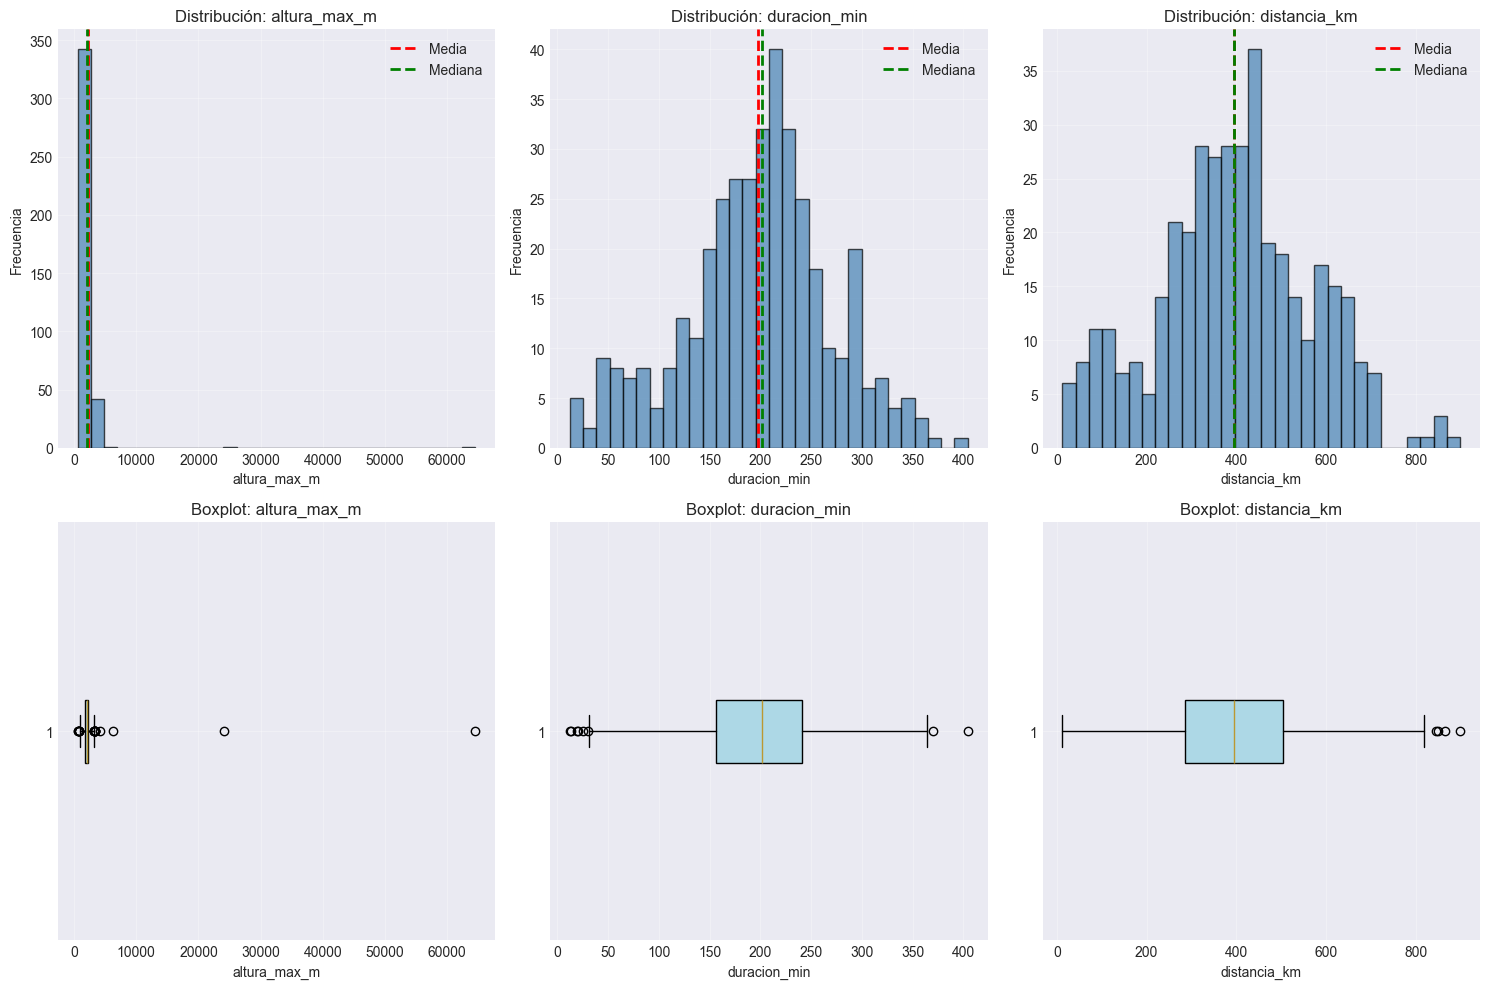

In [132]:
# Visualizar distribuciones de targets
plot_target_distributions(
    df, targets_regresion, save_path=f"{vis_dir}/02_distribucion_targets.png"
)

**Observaciones sobre normalidad:**
- Las distribuciones muestran características no-normales
- Esto justifica el uso de RobustScaler en lugar de StandardScaler

---
## 5. Análisis de Desbalanceo de Clases

In [133]:
# Analizar balance de clases
balance_info = check_class_balance(df, target_clasificacion)

print("=" * 70)
print("ANÁLISIS DE DESBALANCEO DE CLASES")
print("=" * 70)
print(f"\nConteos por clase:")
print(balance_info["counts"])
print(f"\nPorcentajes:")
print(balance_info["percentages"])
print(f"\nRatio de desbalanceo: {balance_info['imbalance_ratio']:.2f}")
print(f"Estado: {balance_info['balance_status']}")

ANÁLISIS DE DESBALANCEO DE CLASES

Conteos por clase:
calidad_dia
Bueno        248
Excelente     69
Regular       60
Malo          10
Name: count, dtype: int64

Porcentajes:
calidad_dia
Bueno       64.083
Excelente   17.829
Regular     15.504
Malo         2.584
Name: proportion, dtype: float64

Ratio de desbalanceo: 24.80
Estado: Fuertemente desbalanceado


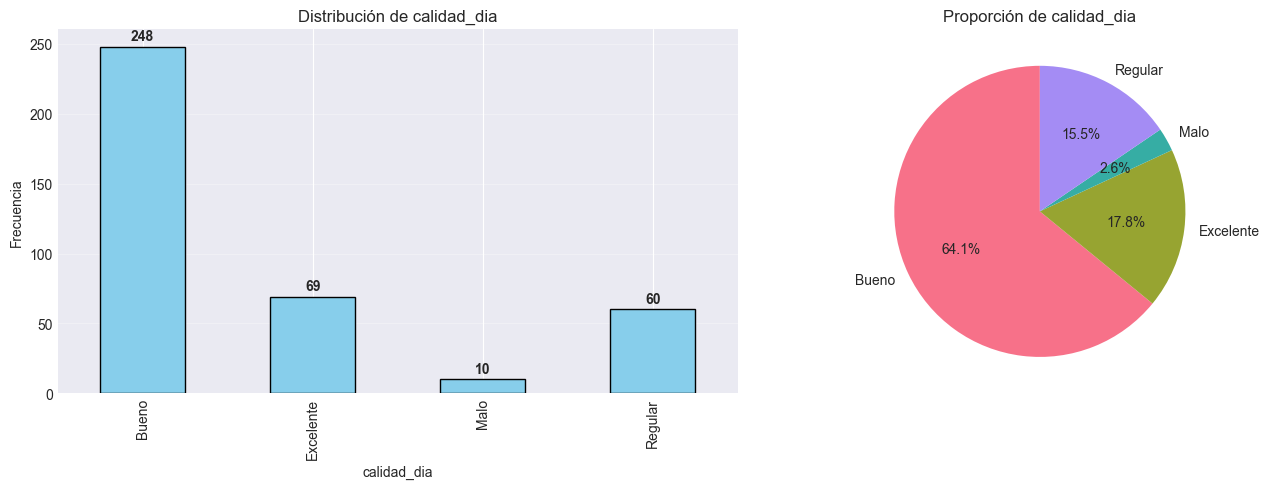

In [134]:
# Visualizar distribución de clases
plot_class_distribution(
    df, target_clasificacion, save_path=f"{vis_dir}/03_distribucion_clases.png"
)

**Decisión sobre desbalanceo:**
- Si el desbalanceo es moderado-fuerte, considerar técnicas como SMOTE o class weights en el modelado

---
## 6. Análisis de Distribuciones de Features

### 6.1 Features Meteorológicas

In [135]:
# Identificar features meteorológicas
features_meteo = [
    "temp_2m_max",
    "temp_2m_min",
    "temp_2m_mean",
    "temp_differential",
    "solar_rad_total",
    "solar_rad_max",
    "cape_max",
    "cape_mean",
    "boundary_layer_height_max",
    "boundary_layer_height_mean",
    "wind_speed_mean",
    "wind_u_mean",
    "wind_v_mean",
    "cloud_cover_mean",
    "pressure_mean",
    "precipitation_total",
]
features_meteo = [f for f in features_meteo if f in df.columns]

print(f"Features meteorológicas identificadas: {len(features_meteo)}")

Features meteorológicas identificadas: 16


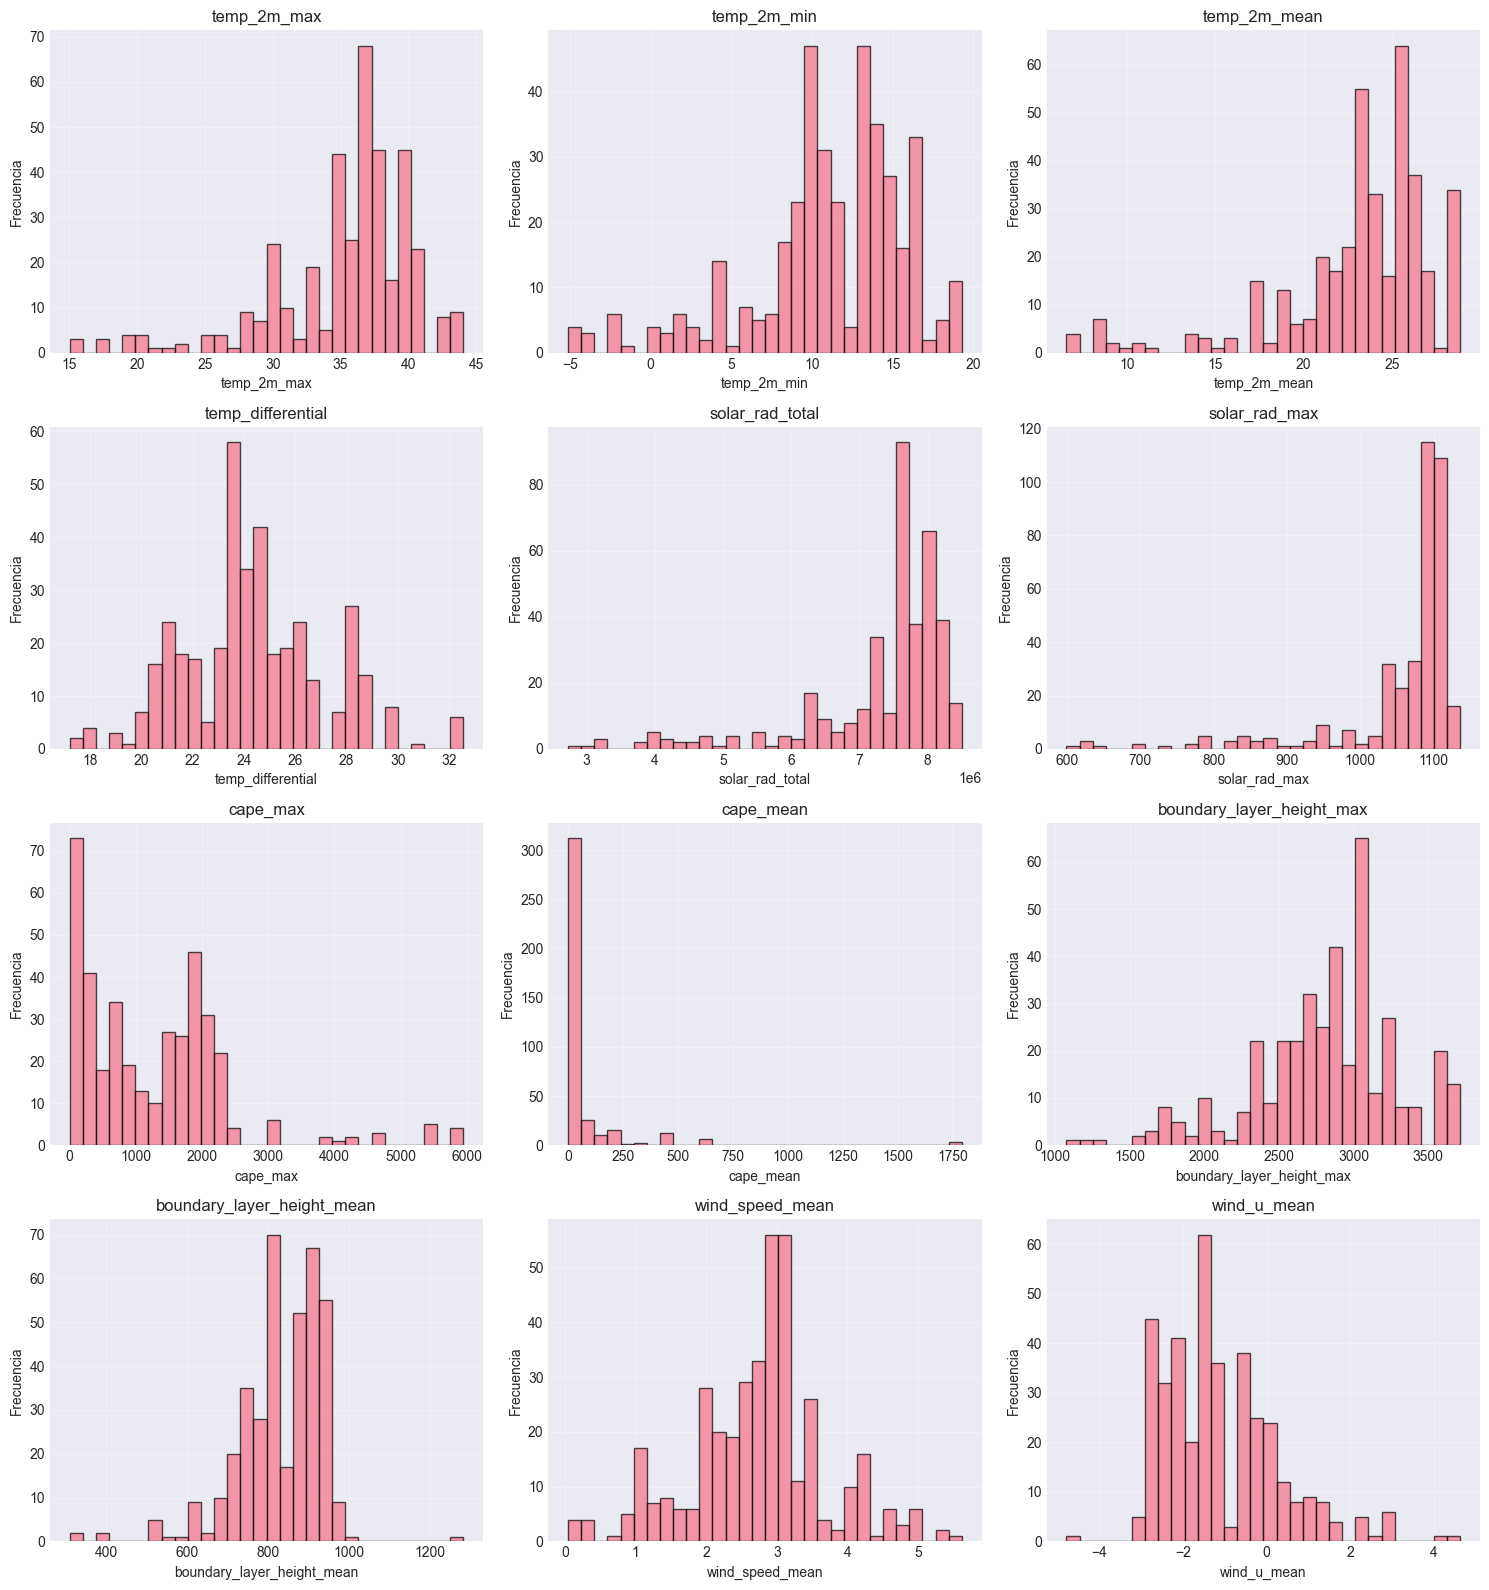

In [136]:
# Visualizar distribuciones meteorológicas
features_meteo_vis = features_meteo[:12]  # Primeras 12
plot_feature_distributions(
    df, features_meteo_vis, save_path=f"{vis_dir}/04_distribucion_meteo.png", n_cols=3
)

### 6.2 Features de Vuelo (IGC)

In [137]:
# Features clave de vuelo
features_vuelo = [
    "num_termicas",
    "intensidad_termicas_mean_ms",
    "duracion_termica_mean_seg",
    "ganancia_altura_m",
    "velocidad_promedio_kmh",
    "porcentaje_tiempo_termicas",
    "ground_speed_mean_kmh",
    "bearing_change_mean_deg",
    "altura_std_m",
]
features_vuelo = [f for f in features_vuelo if f in df.columns]

print(f"Features de vuelo seleccionadas: {len(features_vuelo)}")

Features de vuelo seleccionadas: 9


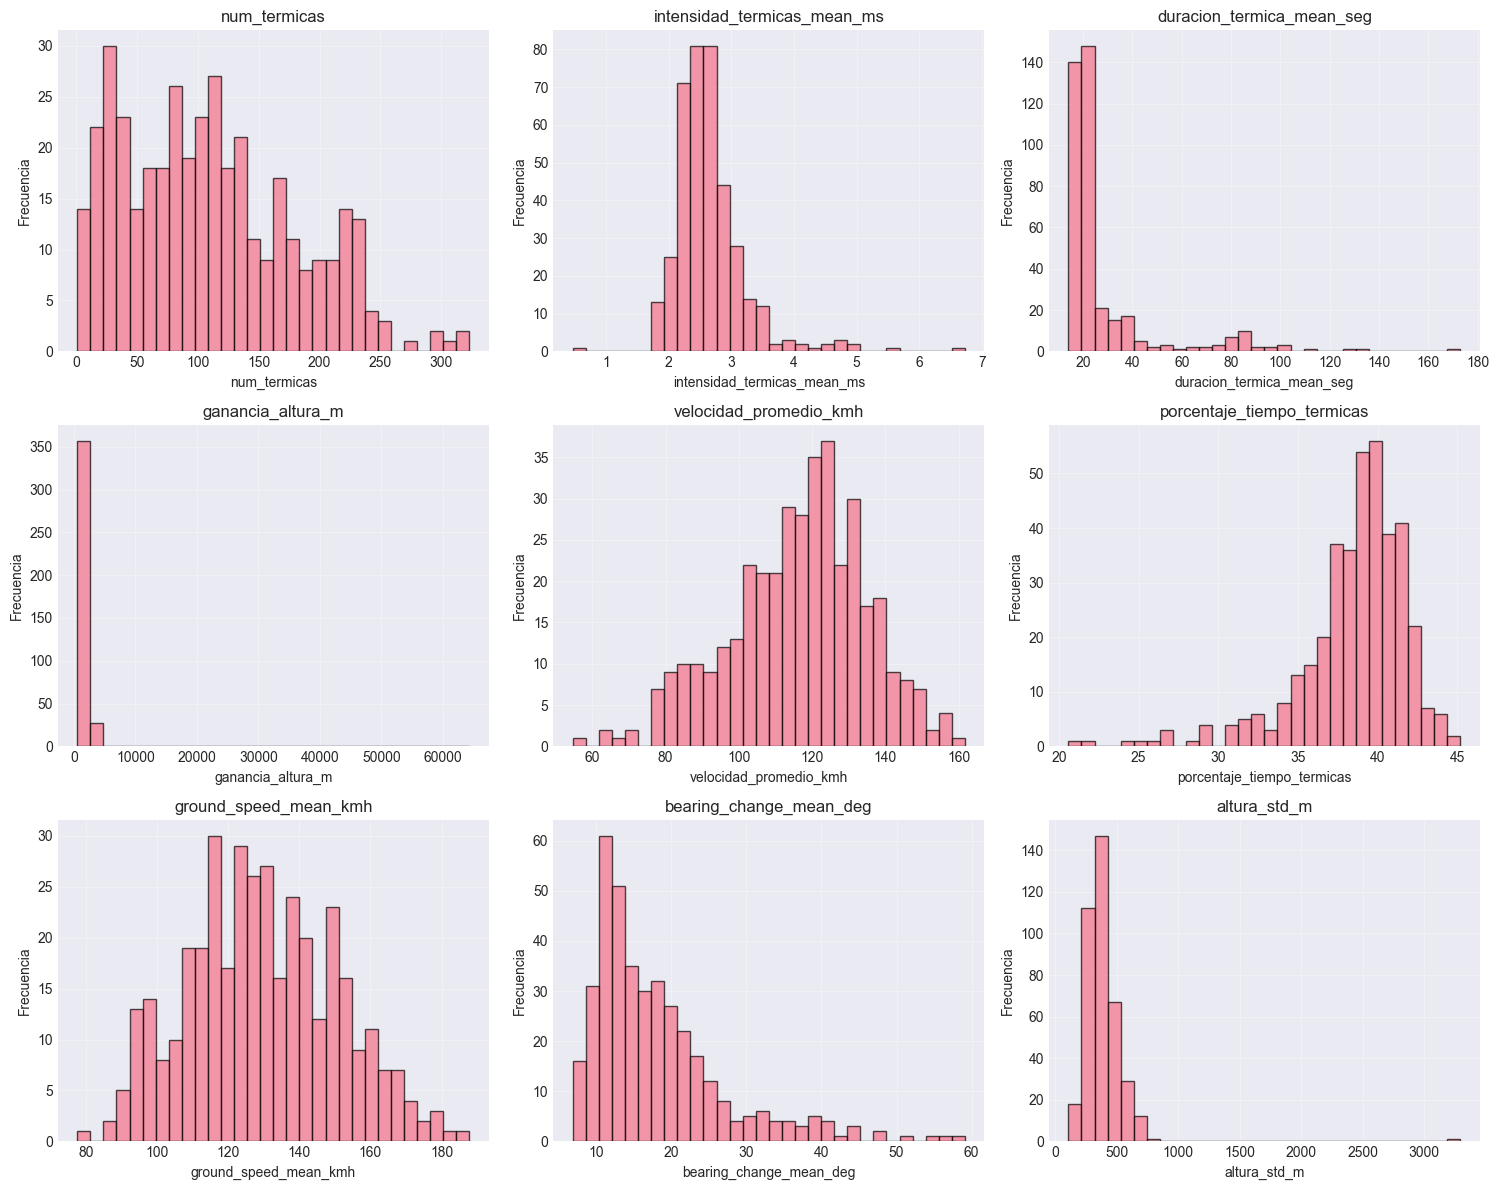

In [138]:
# Visualizar distribuciones de vuelo
plot_feature_distributions(
    df, features_vuelo, save_path=f"{vis_dir}/05_distribucion_vuelo.png", n_cols=3
)

---
## 7. Rangos de Features y Relación con Target

In [139]:
# Obtener rangos de todas las features numéricas
feature_ranges = get_feature_value_ranges(df)

print("Rangos de features (ordenadas por rango):")
print(feature_ranges.head(20))

Rangos de features (ordenadas por rango):
                        feature         min         max       range  \
41         ground_speed_max_kmh     146.200         inf         inf   
40        ground_speed_mean_kmh      77.600         inf         inf   
64              solar_rad_total 2728935.538 8503746.560 5774811.022   
0                  altura_max_m     560.000   64500.000   63940.000   
4             ganancia_altura_m     528.000   64299.000   63771.000   
5                rango_altura_m     532.000   64299.000   63767.000   
59               area_vuelo_km2       4.500   28228.600   28224.100   
13                num_gps_fixes     260.000   21228.000   20968.000   
66          precipitation_total       0.000   10720.131   10720.131   
77                     cape_max       1.625    5949.250    5947.625   
60                 altura_std_m     107.200    3293.500    3186.300   
23   altura_tope_termicas_max_m     556.000    3415.000    2859.000   
75    boundary_layer_height_max    

In [140]:
# Features con mayor variabilidad (alto coeficiente de variación)
high_cv = feature_ranges.sort_values("cv", ascending=False).head(15)
print("\nFeatures con mayor variabilidad (CV):")
print(high_cv[["feature", "cv", "mean", "std"]])


Features con mayor variabilidad (CV):
                       feature        cv     mean      std
46        altura_mean_manana_m       inf    0.000    0.000
47      altura_mean_mediodia_m       inf    0.000    0.000
18  intensidad_termicas_min_ms 13152.744    0.034    4.496
42        ground_speed_min_kmh  5048.650    0.018    0.913
48        altura_mean_tarde1_m   824.083   14.731  121.398
63         cambio_altura_std_m   706.889   12.336   87.199
66         precipitation_total   335.072  272.950  914.577
76                   cape_mean   270.109   70.792  191.214
4            ganancia_altura_m   163.081 2091.413 3410.688
5               rango_altura_m   162.849 2094.336 3410.611
17  intensidad_termicas_max_ms   155.111   26.313   40.815
0                 altura_max_m   153.162 2231.612 3417.991
2            altura_despegue_m   124.908  187.264  233.908
84                     dia_año   101.944  145.765  148.599
19  intensidad_termicas_std_ms    99.965    1.170    1.170


---
## 8. Análisis de Correlaciones

### 8.1 Matriz de Correlación Completa

In [141]:
# Calcular matriz de correlación COMPLETA
# Incluir TODAS las features numéricas
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
print(
    f"Calculando matriz de correlación para {len(numeric_features)} features numéricas..."
)

corr_matrix_full = compute_correlation_matrix(df, features=numeric_features)
print(f"\nMatriz calculada: {corr_matrix_full.shape}")

Calculando matriz de correlación para 87 features numéricas...

Matriz calculada: (87, 87)


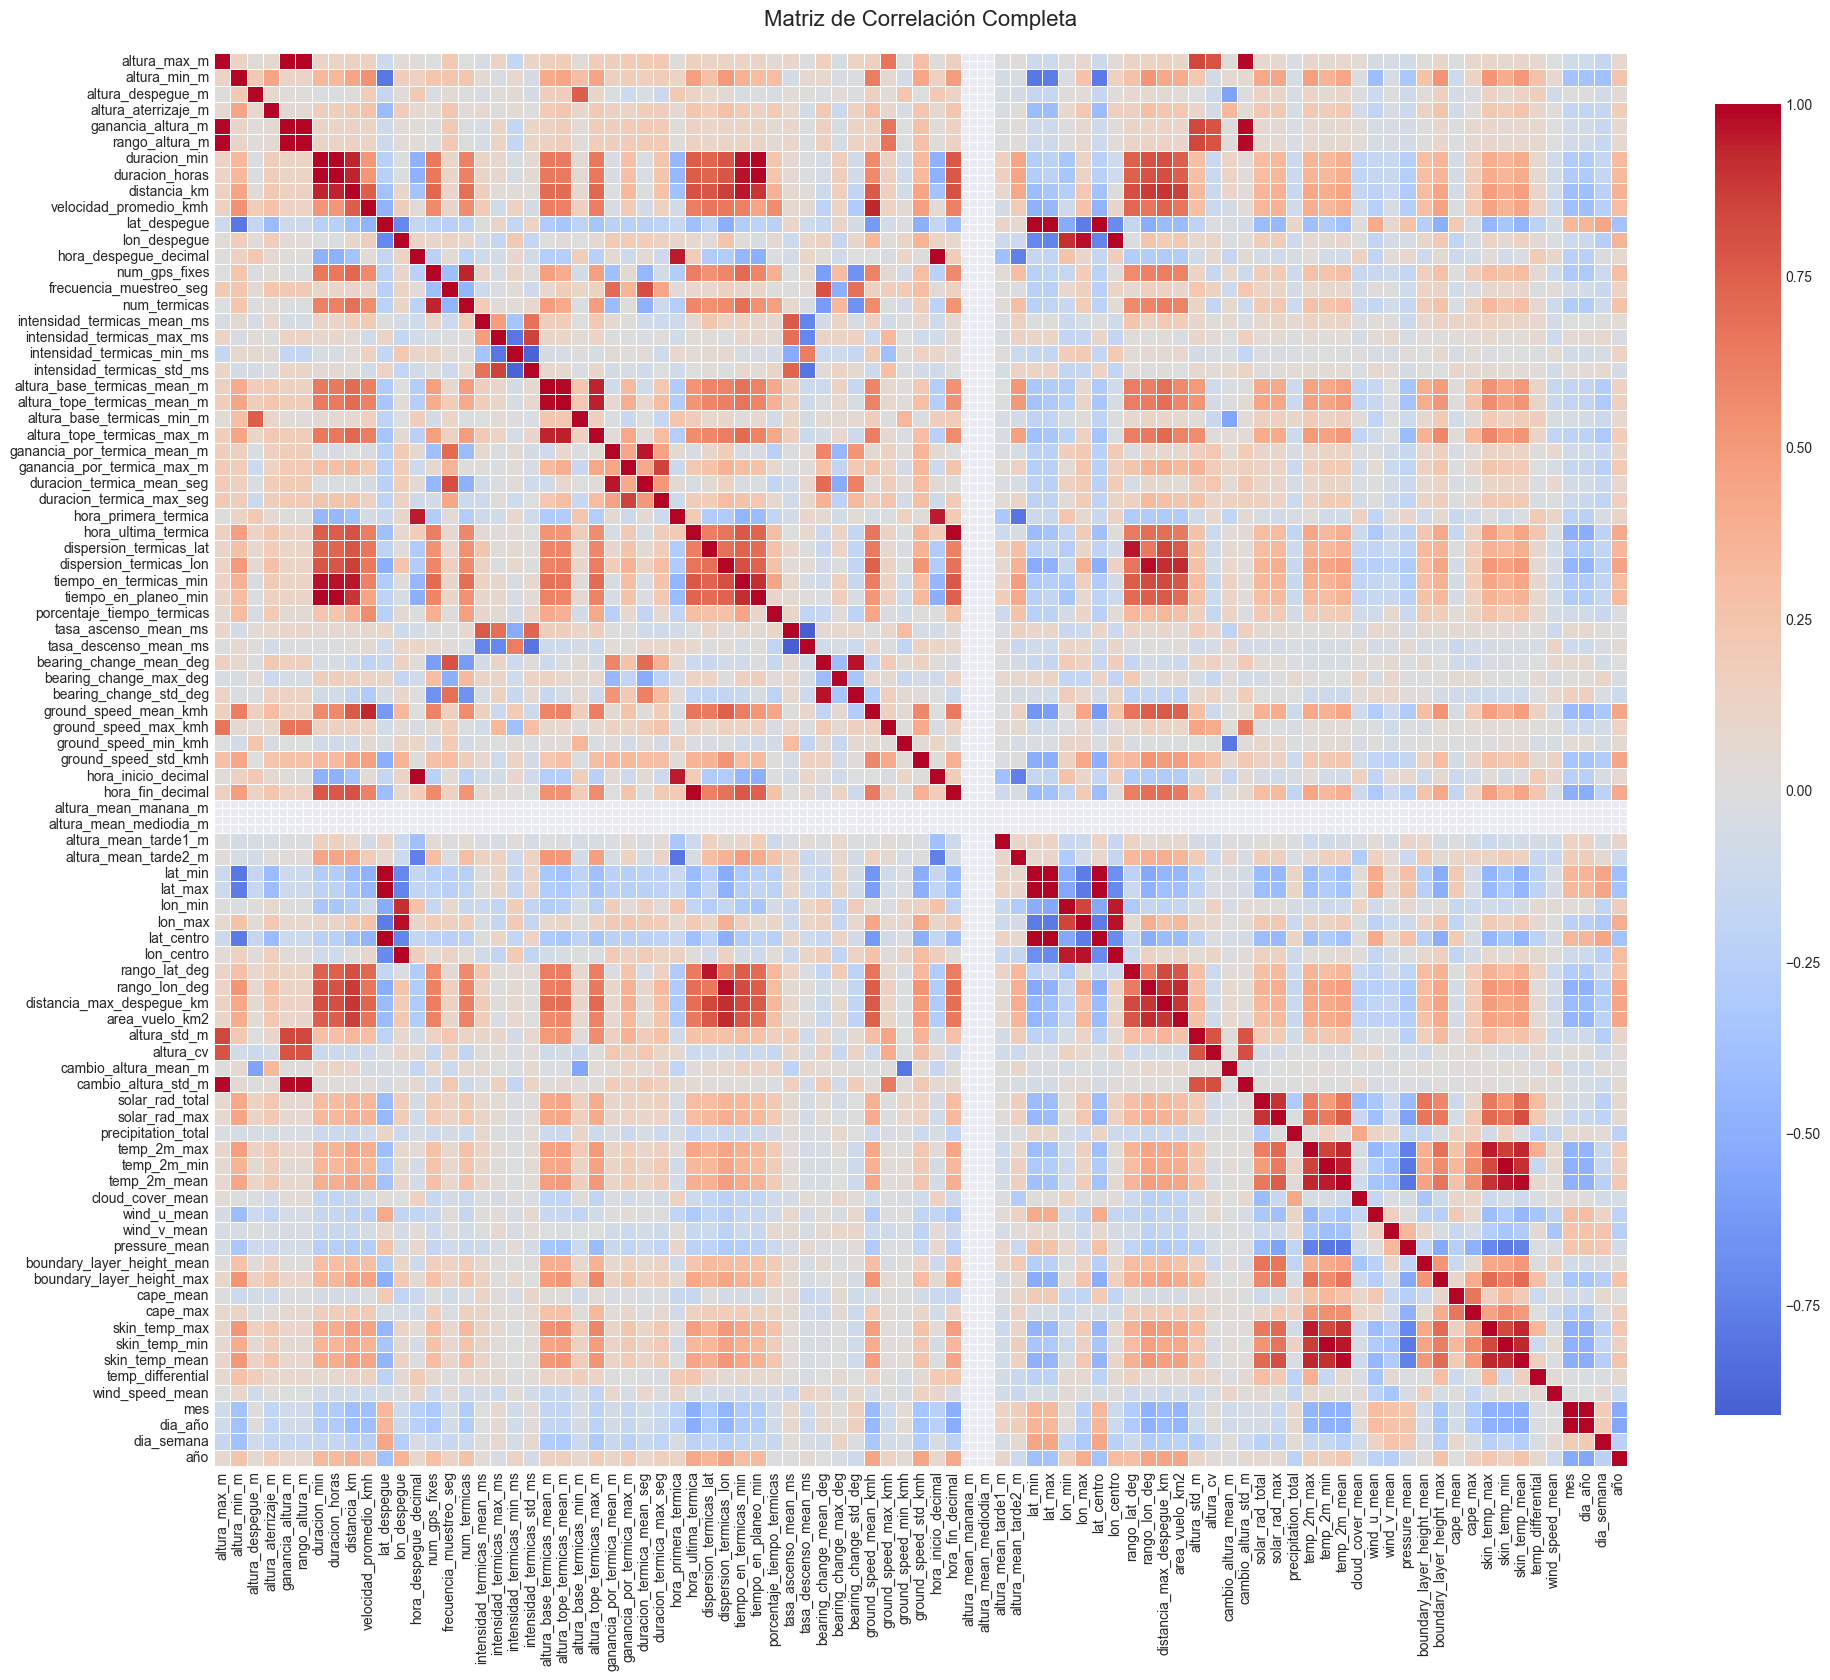

In [142]:
# Visualizar matriz completa
plot_correlation_matrix(
    corr_matrix_full,
    save_path=f"{vis_dir}/06_matriz_correlacion_completa.png",
    figsize=(20, 18),
    annot=False,
)

### 8.2 Correlaciones Altas (Multicolinealidad)

In [143]:
# Identificar features altamente correlacionadas entre sí
high_corr_pairs = find_high_correlations(corr_matrix_full, threshold=0.8)

if len(high_corr_pairs) > 0:
    print("=" * 70)
    print("FEATURES ALTAMENTE CORRELACIONADAS (|r| >= 0.8)")
    print("=" * 70)
    print(f"\nEncontrados {len(high_corr_pairs)} pares:\n")
    print(high_corr_pairs.head(20))
    print("\n⚠️ Considerar eliminar una de cada par para reducir multicolinealidad")
else:
    print("✓ No se encontraron correlaciones muy altas (|r| >= 0.8)")

FEATURES ALTAMENTE CORRELACIONADAS (|r| >= 0.8)

Encontrados 88 pares:

                      feature_1                    feature_2  correlation
33        hora_despegue_decimal          hora_inicio_decimal        1.000
4             ganancia_altura_m               rango_altura_m        1.000
9                  duracion_min               duracion_horas        1.000
0                  altura_max_m            ganancia_altura_m        1.000
1                  altura_max_m               rango_altura_m        1.000
28                 lat_despegue                   lat_centro        0.999
59                      lat_min                   lat_centro        0.999
60                      lat_max                   lat_centro        0.999
87                          mes                      dia_año        0.999
26                 lat_despegue                      lat_min        0.998
27                 lat_despegue                      lat_max        0.998
58                      lat_min         

### 8.3 Features Correlacionadas con Targets

In [144]:
# Analizar importancia de features por correlación con cada target
feature_importance = analyze_feature_importance_by_correlation(
    df, targets_regresion, top_n=15
)

for target, importance in feature_importance.items():
    print(f"\n{'='*70}")
    print(f"TOP FEATURES CORRELACIONADAS CON {target}")
    print(f"{'='*70}")
    print(f"\nTop 15 (por valor absoluto):")
    print(importance["top_absolute"])


TOP FEATURES CORRELACIONADAS CON altura_max_m

Top 15 (por valor absoluto):
ganancia_altura_m             1.000
rango_altura_m                1.000
cambio_altura_std_m           0.980
altura_std_m                  0.842
altura_cv                     0.788
ground_speed_max_kmh          0.671
ground_speed_std_kmh          0.280
frecuencia_muestreo_seg       0.216
duracion_termica_max_seg      0.210
ganancia_por_termica_max_m    0.206
duracion_termica_mean_seg     0.198
altura_tope_termicas_mean_m   0.181
altura_tope_termicas_max_m    0.179
intensidad_termicas_min_ms    0.170
ganancia_por_termica_mean_m   0.167
Name: altura_max_m, dtype: float64

TOP FEATURES CORRELACIONADAS CON duracion_min

Top 15 (por valor absoluto):
duracion_horas                1.000
tiempo_en_planeo_min          0.987
tiempo_en_termicas_min        0.967
distancia_max_despegue_km     0.806
rango_lon_deg                 0.795
dispersion_termicas_lon       0.780
hora_fin_decimal              0.771
hora_ultima_termica

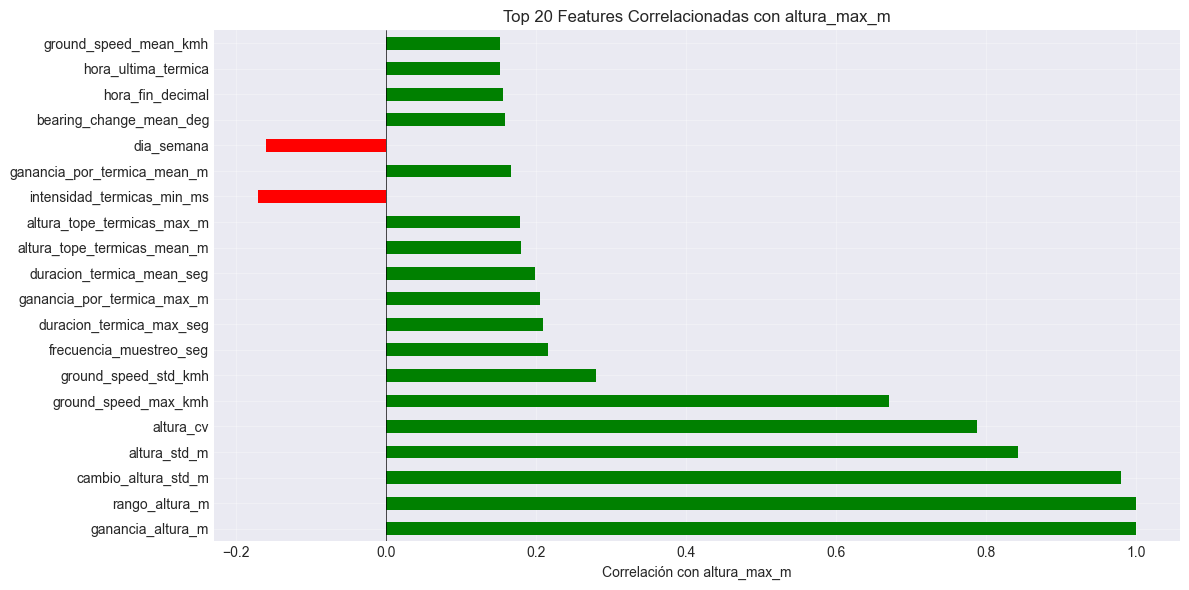

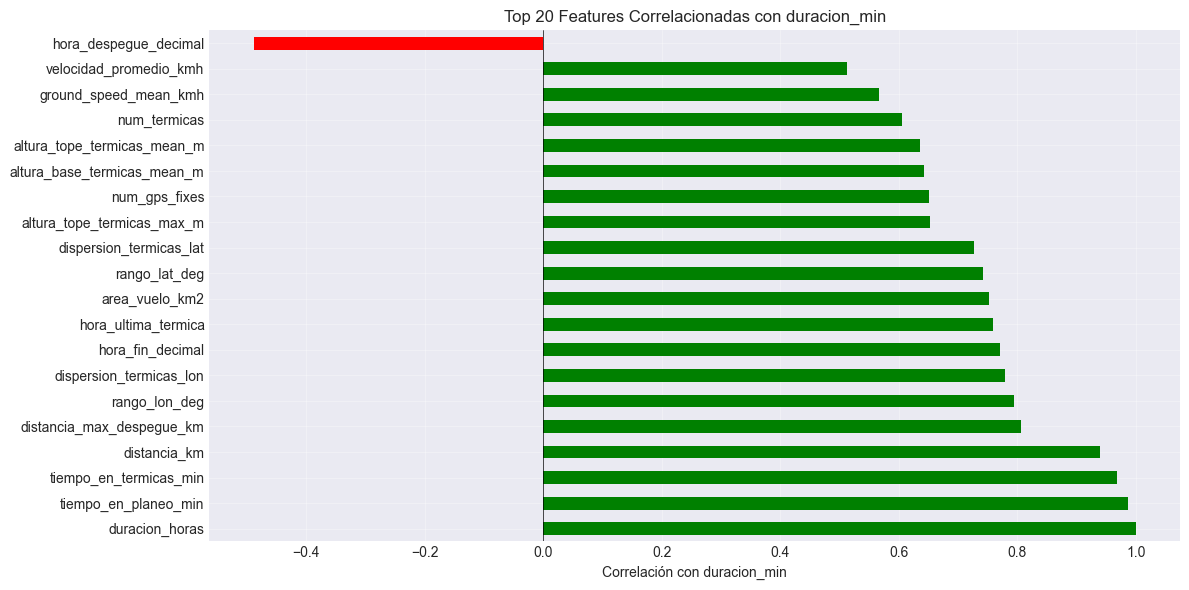

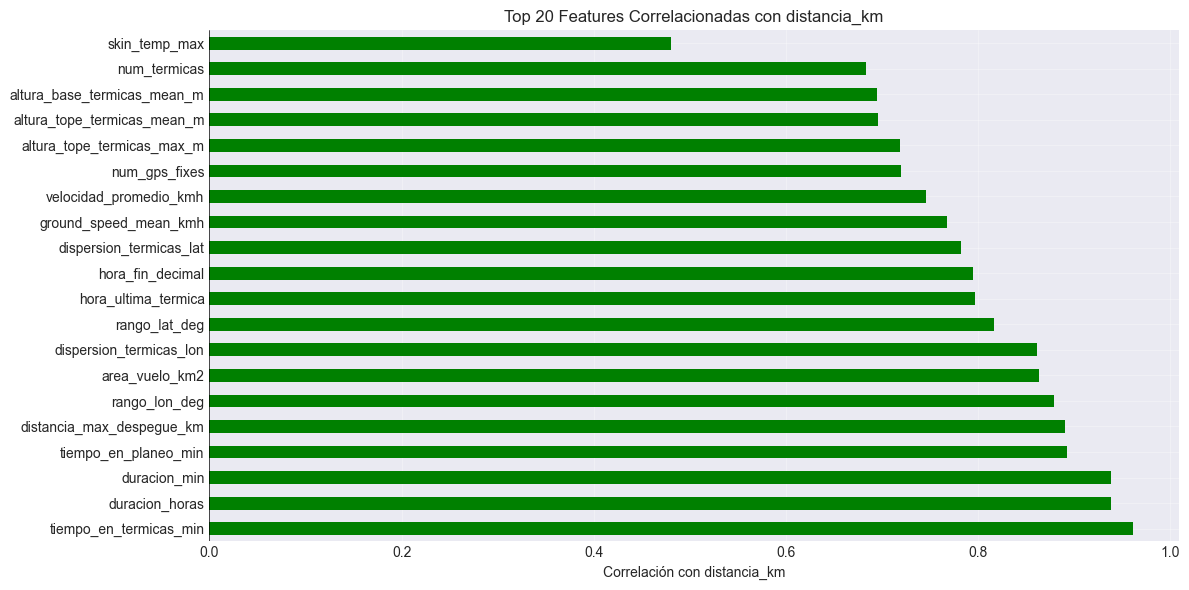

In [145]:
# Visualizar correlaciones con cada target
for target in targets_regresion:
    if target in df.columns:
        plot_correlation_with_target(
            df, target, top_n=20, save_path=f"{vis_dir}/07_correlacion_{target}.png"
        )

### 8.4 Scatter Plots: Features vs Targets

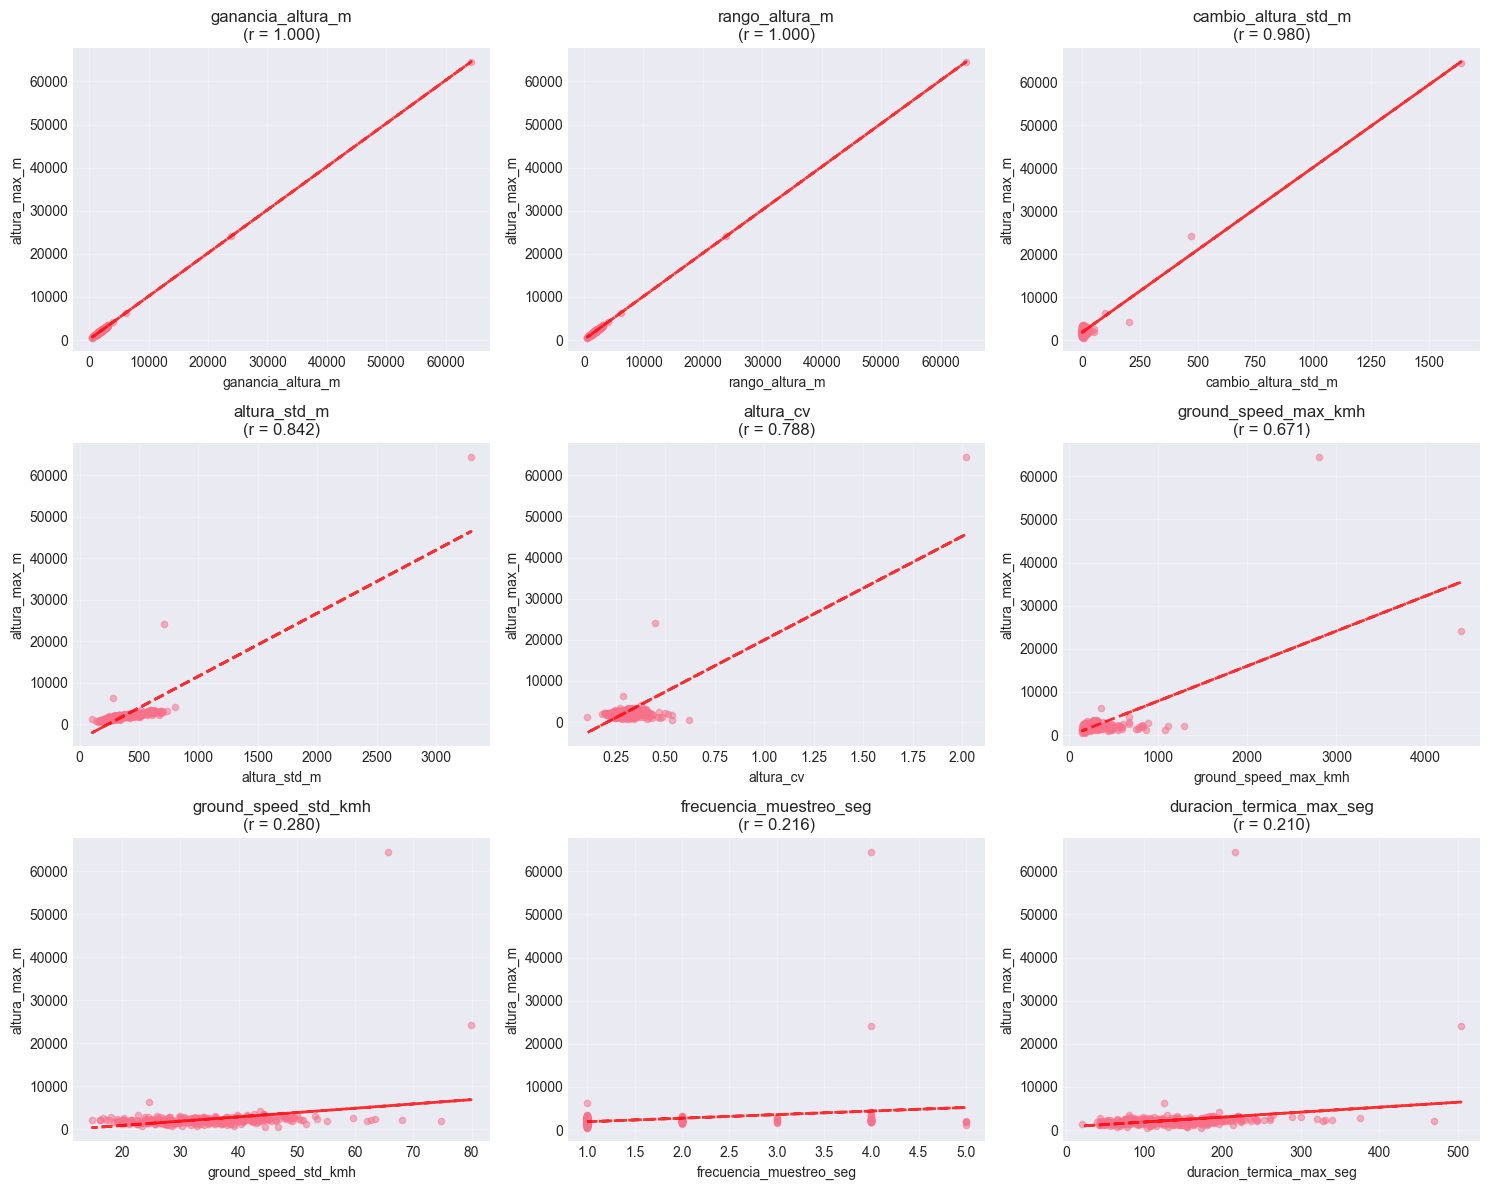

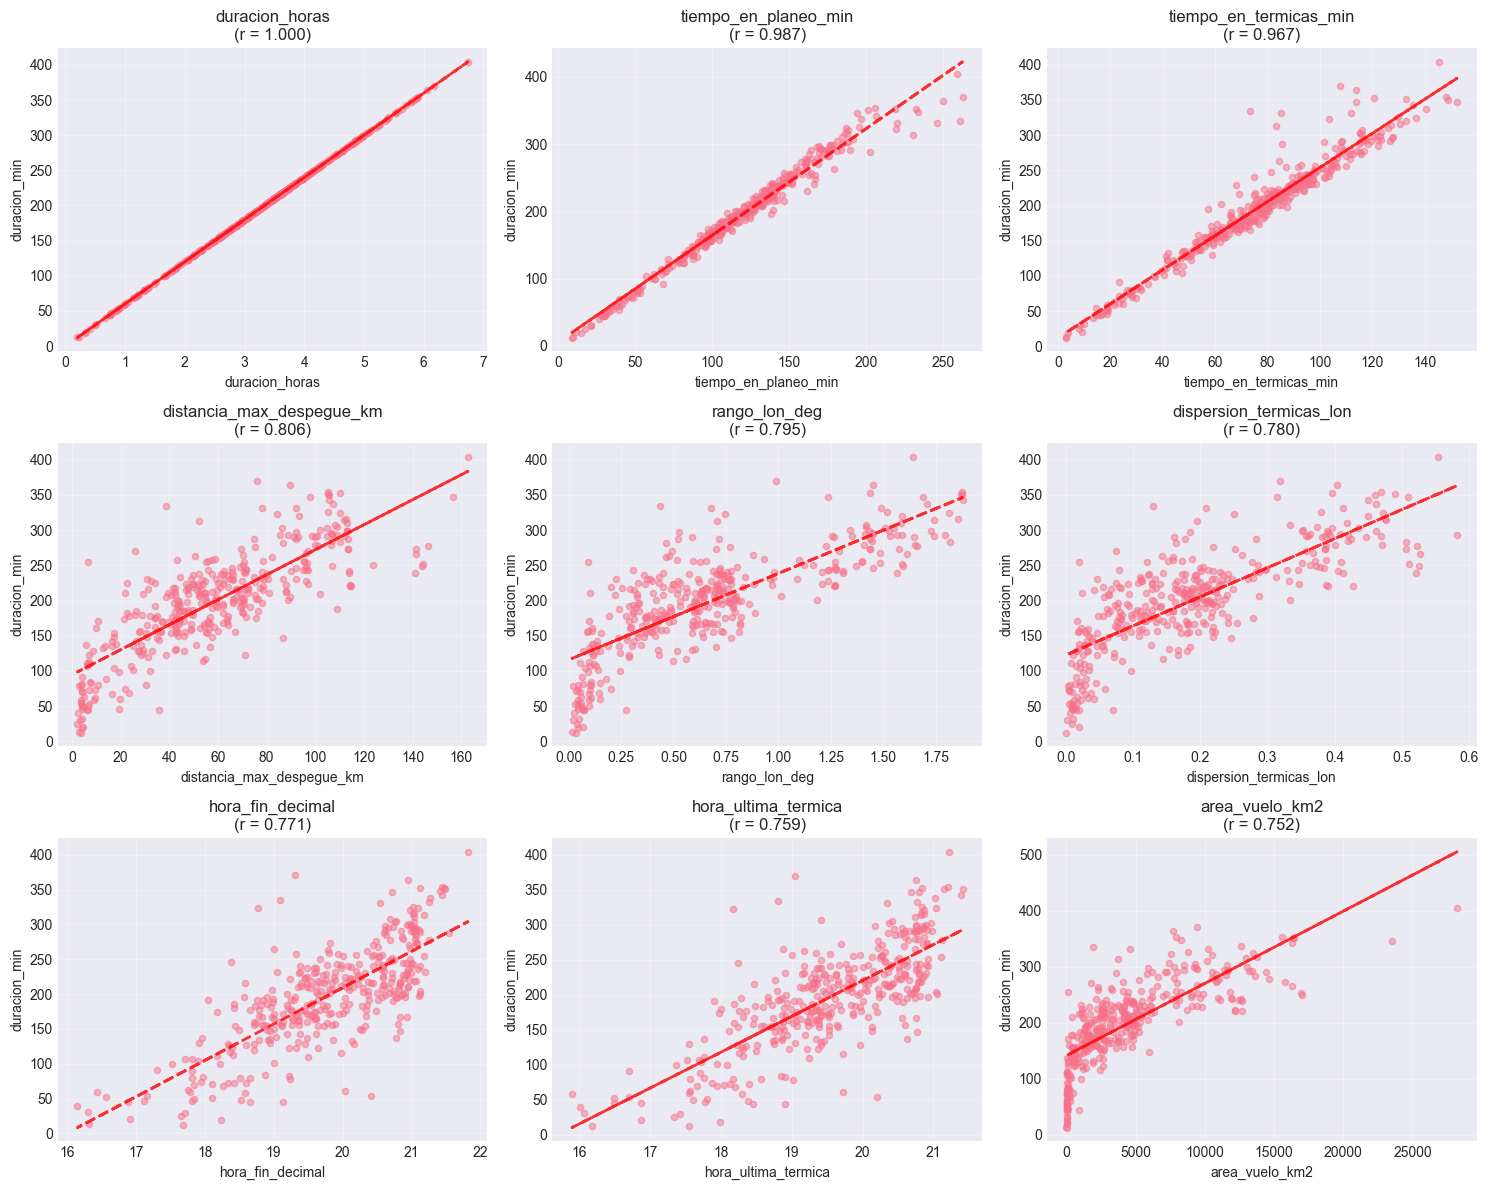

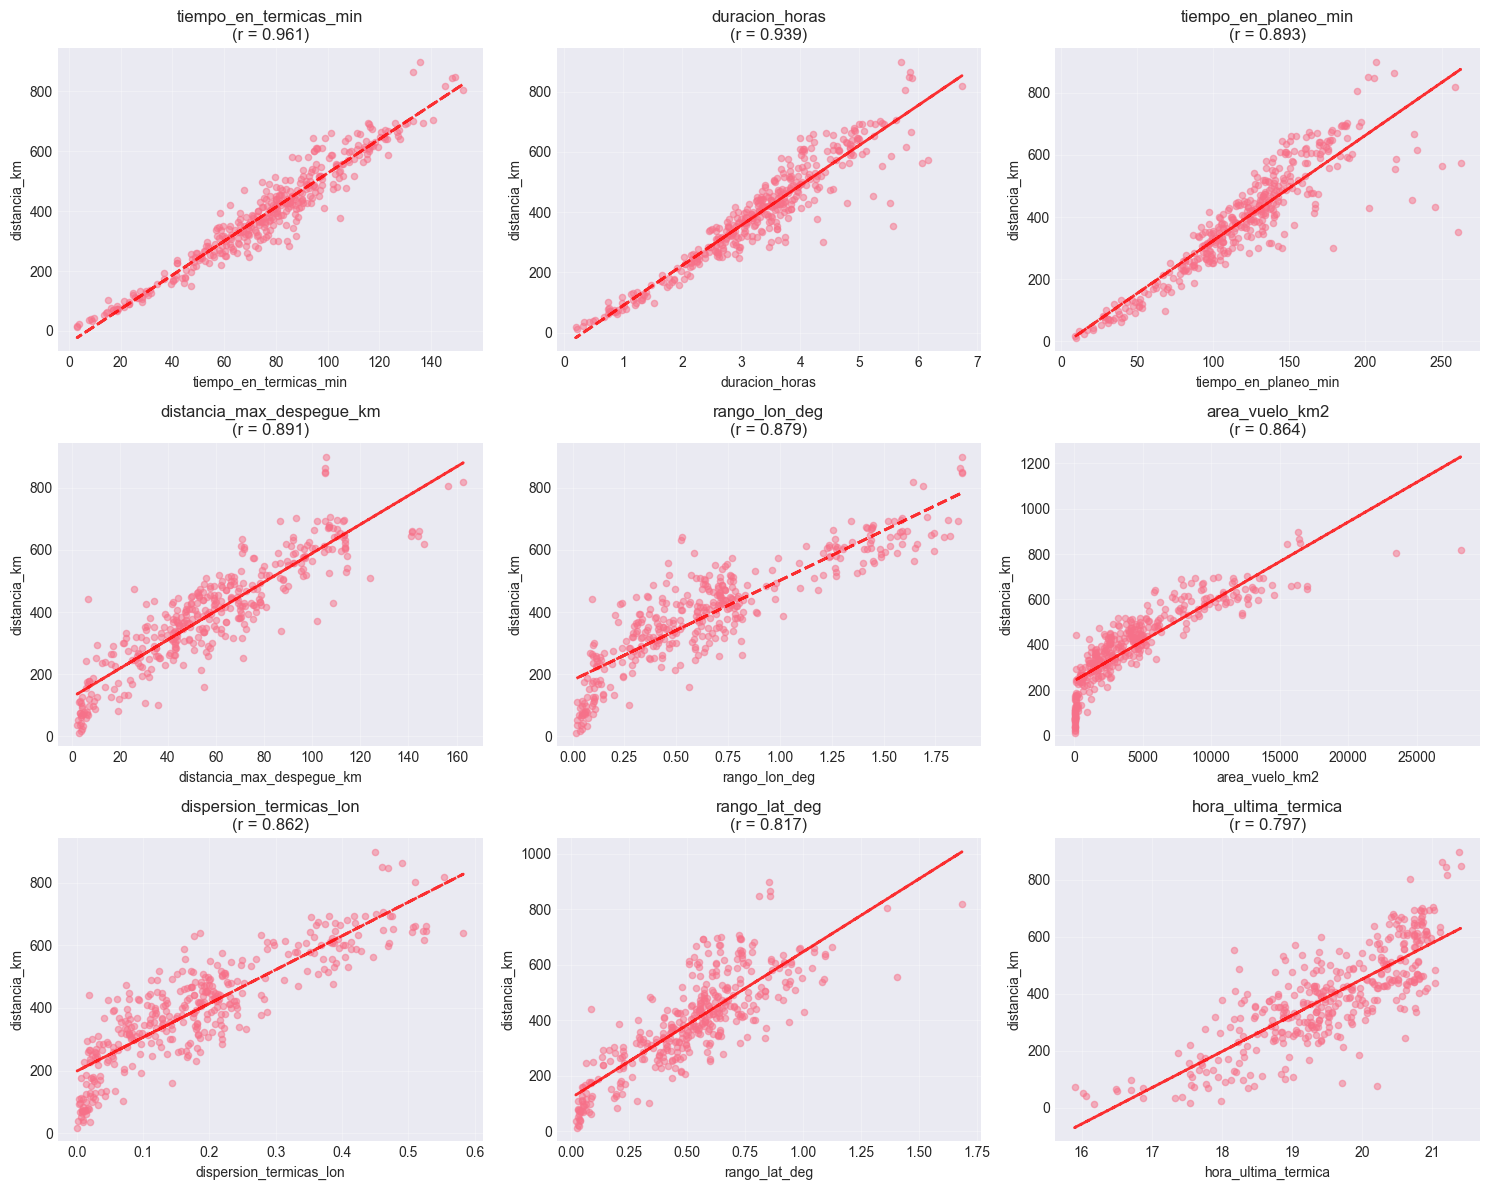

In [146]:
# Scatter plots de top features vs cada target
for target in targets_regresion:
    if target in df.columns:
        # Obtener top 9 features correlacionadas
        top_features = feature_importance[target]["top_absolute"].head(9).index.tolist()

        plot_scatter_matrix_with_target(
            df, target, top_features, save_path=f"{vis_dir}/08_scatter_{target}.png"
        )

---
## 9. Detección de Outliers

In [147]:
# Analizar outliers en targets con múltiples métodos
print("=" * 70)
print("DETECCIÓN DE OUTLIERS EN TARGETS")
print("=" * 70)

for target in targets_regresion:
    if target in df.columns:
        print(f"\n{target}:")
        outliers = detect_outliers_multiple_methods(df, target)

        for method, info in outliers.items():
            print(f"  {method.upper()}:")
            print(f"    Outliers: {info['count']} ({info['percentage']:.2f}%)")
            if "lower_bound" in info:
                print(
                    f"    Bounds: [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}]"
                )

DETECCIÓN DE OUTLIERS EN TARGETS

altura_max_m:
  IQR:
    Outliers: 20 (5.17%)
    Bounds: [836.50, 3144.50]
  ZSCORE:
    Outliers: 2 (0.52%)
  PERCENTILE:
    Outliers: 8 (2.07%)

duracion_min:
  IQR:
    Outliers: 8 (2.07%)
    Bounds: [30.03, 367.43]
  ZSCORE:
    Outliers: 0 (0.00%)
  PERCENTILE:
    Outliers: 8 (2.07%)

distancia_km:
  IQR:
    Outliers: 4 (1.03%)
    Bounds: [-45.17, 834.62]
  ZSCORE:
    Outliers: 0 (0.00%)
  PERCENTILE:
    Outliers: 8 (2.07%)


**Decisión sobre outliers:**
- NO eliminaremos outliers en targets (son vuelos reales extremos)
- Aplicaremos winsorización a features para reducir impacto de valores extremos



---
## 10. Comparación por Calidad de Día

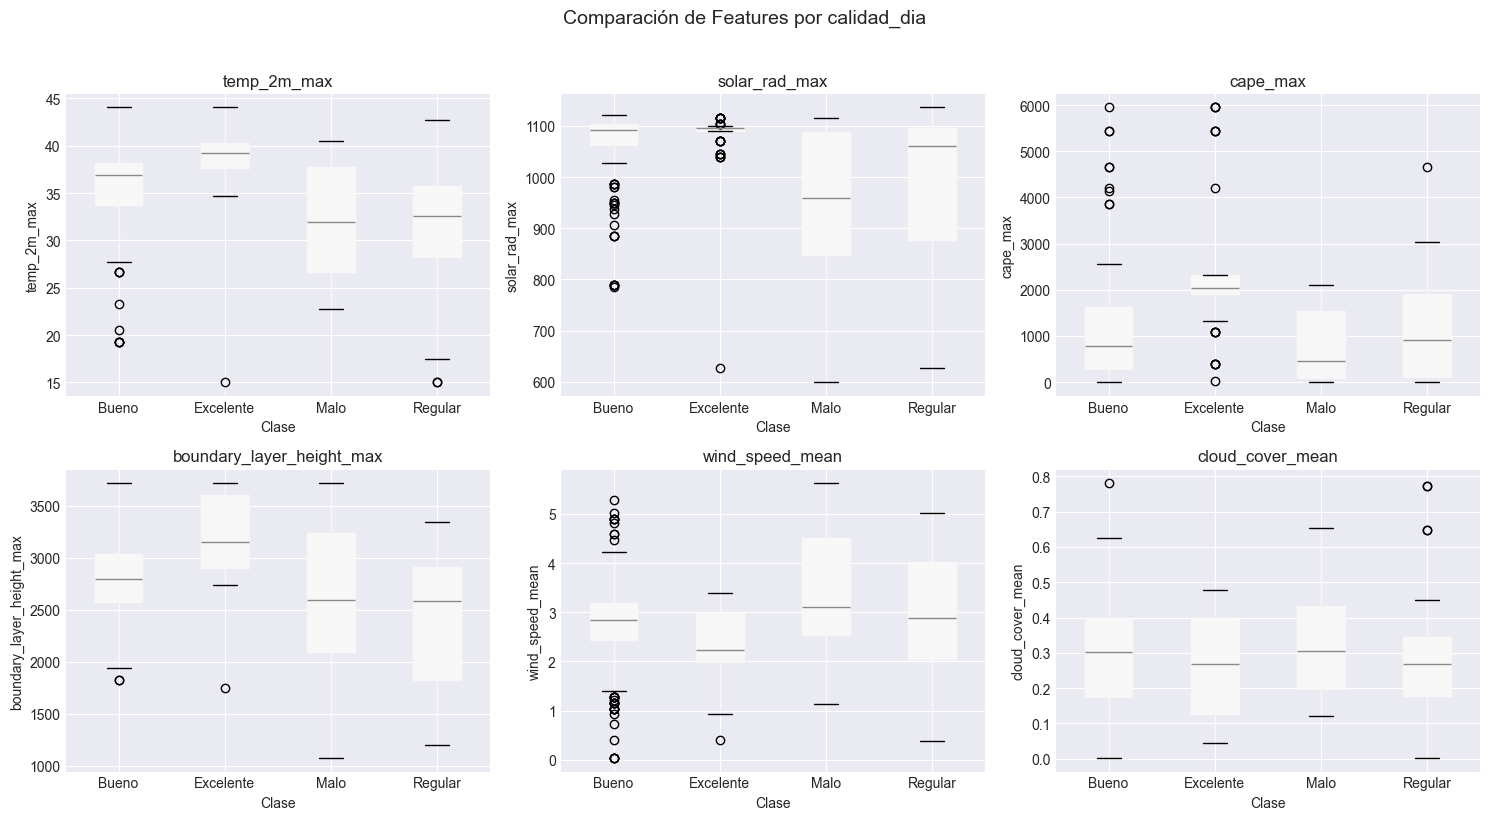

In [148]:
# Comparar features meteorológicas por calidad de día
features_comparar = [
    "temp_2m_max",
    "solar_rad_max",
    "cape_max",
    "boundary_layer_height_max",
    "wind_speed_mean",
    "cloud_cover_mean",
]
features_comparar = [f for f in features_comparar if f in df.columns]

plot_boxplots_by_class(
    df,
    features_comparar,
    target_clasificacion,
    save_path=f"{vis_dir}/09_comparacion_por_calidad.png",
    n_cols=3,
)

---
## 11. Split Train/Val/Test (70/15/15)

In [149]:
# Split estratificado en 3 conjuntos
print("=" * 70)
print("SPLIT ESTRATIFICADO TRAIN/VAL/TEST")
print("=" * 70)

train_df, val_df, test_df = split_train_val_test(
    df,
    stratify_col=target_clasificacion,
    train_size=0.70,
    val_size=0.15,
    test_size=0.15,
    random_state=42,
)

print(f"\n✓ Train: {len(train_df)} ({len(train_df)/len(df)*100:.1f}%)")
print(f"✓ Val: {len(val_df)} ({len(val_df)/len(df)*100:.1f}%)")
print(f"✓ Test: {len(test_df)} ({len(test_df)/len(df)*100:.1f}%)")

SPLIT ESTRATIFICADO TRAIN/VAL/TEST

✓ Train: 270 (69.8%)
✓ Val: 58 (15.0%)
✓ Test: 59 (15.2%)


In [150]:
# Verificar estratificación
print("\nVerificación de estratificación:")
print("\nDistribución en TRAIN:")
print(train_df[target_clasificacion].value_counts(normalize=True).sort_index())
print("\nDistribución en VAL:")
print(val_df[target_clasificacion].value_counts(normalize=True).sort_index())
print("\nDistribución en TEST:")
print(test_df[target_clasificacion].value_counts(normalize=True).sort_index())


Verificación de estratificación:

Distribución en TRAIN:
calidad_dia
Bueno       0.641
Excelente   0.178
Malo        0.026
Regular     0.156
Name: proportion, dtype: float64

Distribución en VAL:
calidad_dia
Bueno       0.638
Excelente   0.172
Malo        0.034
Regular     0.155
Name: proportion, dtype: float64

Distribución en TEST:
calidad_dia
Bueno       0.644
Excelente   0.186
Malo        0.017
Regular     0.153
Name: proportion, dtype: float64


---
## 12. Preprocesamiento

In [151]:
# Crear pipeline de preprocesamiento
preprocessor = PreprocessingPipeline()
print("✓ Pipeline de preprocesamiento creado")

✓ Pipeline de preprocesamiento creado


### 12.1 Eliminar Features Inútiles

In [152]:
# Eliminar features recomendadas
features_to_drop = useless_features["recommended_to_drop"]
features_to_drop = [f for f in features_to_drop if f in train_df.columns]

print(f"Features a eliminar: {len(features_to_drop)}")
print(features_to_drop)

train_df = train_df.drop(columns=features_to_drop)
val_df = val_df.drop(columns=features_to_drop)
test_df = test_df.drop(columns=features_to_drop)

print(f"\n✓ Train shape: {train_df.shape}")
print(f"✓ Val shape: {val_df.shape}")
print(f"✓ Test shape: {test_df.shape}")

Features a eliminar: 20
['distancia_km', 'num_gps_fixes', 'dispersion_termicas_lon', 'ground_speed_min_kmh', 'altura_mean_manana_m', 'altura_mean_mediodia_m', 'altura_mean_tarde1_m', 'lat_min', 'lat_max', 'lon_min', 'lon_max', 'lat_centro', 'lon_centro', 'rango_lat_deg', 'rango_lon_deg', 'area_vuelo_km2', 'cambio_altura_mean_m', 'filename', 'flight_id', 'fecha_dt']

✓ Train shape: (270, 76)
✓ Val shape: (58, 76)
✓ Test shape: (59, 76)


### 12.2 Tratamiento de Valores Faltantes

In [153]:
print("=" * 70)
print("IMPUTACIÓN DE VALORES FALTANTES")
print("=" * 70)
print(
    """
Estrategia:
1. Columnas con >50% faltantes → ELIMINAR
2. Numéricas → Mediana (robusta a outliers)
3. Categóricas → Moda
4. CRÍTICO: Ajustar solo con TRAIN
"""
)

# Aplicar a train y val
train_clean, val_clean, imputer_info = preprocessor.handle_missing_values(
    train_df.copy(), val_df.copy(), threshold=0.5
)

# Aplicar mismo tratamiento a test (usando mismos imputers)
test_clean = test_df.copy()
if imputer_info["dropped_columns"]:
    test_clean = test_clean.drop(
        columns=[c for c in imputer_info["dropped_columns"] if c in test_clean.columns]
    )

print(f"\n✓ Columnas eliminadas: {len(imputer_info['dropped_columns'])}")
print(f"✓ Valores imputados: {imputer_info['imputed_count']}")
print(f"\nShapes después de imputación:")
print(f"  Train: {train_clean.shape}")
print(f"  Val: {val_clean.shape}")
print(f"  Test: {test_clean.shape}")

IMPUTACIÓN DE VALORES FALTANTES

Estrategia:
1. Columnas con >50% faltantes → ELIMINAR
2. Numéricas → Mediana (robusta a outliers)
3. Categóricas → Moda
4. CRÍTICO: Ajustar solo con TRAIN


✓ Columnas eliminadas: 0
✓ Valores imputados: 4

Shapes después de imputación:
  Train: (270, 76)
  Val: (58, 76)
  Test: (59, 76)


### 12.3 Tratamiento de Outliers (Winsorización)

In [154]:
print("=" * 70)
print("TRATAMIENTO DE OUTLIERS")
print("=" * 70)
print(
    """
Estrategia:
1. Método: Winsorización (capping)
2. Percentiles: 1% y 99%
3. NO eliminar observaciones
4. Ajustar bounds con TRAIN
"""
)

train_outliers, val_outliers, outlier_info = preprocessor.handle_outliers(
    train_clean.copy(),
    val_clean.copy(),
    method="winsorize",
    lower_percentile=0.01,
    upper_percentile=0.99,
)

# Aplicar mismo tratamiento a test
test_outliers = test_clean.copy()
numeric_cols_test = test_outliers.select_dtypes(include=[np.number]).columns
for col in numeric_cols_test:
    if col in preprocessor.outlier_bounds:
        lower, upper = preprocessor.outlier_bounds[col]
        test_outliers[col] = test_outliers[col].clip(lower, upper)

print(f"\n✓ Features procesadas: {outlier_info['n_features']}")
print(f"✓ Valores modificados (train): {outlier_info['n_modified_train']}")
print(f"✓ Valores modificados (val): {outlier_info['n_modified_val']}")

TRATAMIENTO DE OUTLIERS

Estrategia:
1. Método: Winsorización (capping)
2. Percentiles: 1% y 99%
3. NO eliminar observaciones
4. Ajustar bounds con TRAIN


✓ Features procesadas: 70
✓ Valores modificados (train): 329
✓ Valores modificados (val): 117


Winsorización no elimina filas. Para cada feature numérica calcula, con los datos de train, los percentiles inferior y superior indicados (1 % y 99 %). Si un valor cae fuera de esos límites, se sustituye por el propio límite (se “cappea”). Así todos los outliers más extremos quedan reemplazados por los valores frontera, manteniendo rangos razonables y sin perder observaciones. No introduce un valor ajeno (como la media), solo recorta los extremos.

### 12.4 Codificación de Variables Categóricas (OHE)

In [155]:
print("=" * 70)
print("CODIFICACIÓN DE VARIABLES CATEGÓRICAS")
print("=" * 70)
print(
    """
Estrategia:
1. Método: One-Hot Encoding
2. Excluir: target de clasificación
3. Alinear columnas entre conjuntos
"""
)

# Identificar categóricas
cat_features = [
    col
    for col in train_outliers.select_dtypes(include=["object"]).columns
    if col != target_clasificacion
]

print(f"\nCategóricas a codificar: {len(cat_features)}")
if len(cat_features) > 0:
    print(cat_features)

if len(cat_features) > 0:
    train_encoded, val_encoded, encoding_info = preprocessor.encode_categorical(
        train_outliers.copy(),
        val_outliers.copy(),
        categorical_features=cat_features,
        method="onehot",
    )

    # Aplicar a test
    test_encoded = pd.get_dummies(test_outliers, columns=cat_features, drop_first=True)
    # Alinear columnas
    for col in train_encoded.columns:
        if col not in test_encoded.columns:
            test_encoded[col] = 0
    test_encoded = test_encoded[train_encoded.columns]

    print(f"\n✓ Nuevas columnas creadas: {encoding_info['n_new_columns']}")
else:
    train_encoded = train_outliers.copy()
    val_encoded = val_outliers.copy()
    test_encoded = test_outliers.copy()
    print("\n✓ No hay variables categóricas para codificar")

print(f"\nShapes después de encoding:")
print(f"  Train: {train_encoded.shape}")
print(f"  Val: {val_encoded.shape}")
print(f"  Test: {test_encoded.shape}")

CODIFICACIÓN DE VARIABLES CATEGÓRICAS

Estrategia:
1. Método: One-Hot Encoding
2. Excluir: target de clasificación
3. Alinear columnas entre conjuntos


Categóricas a codificar: 5
['fecha', 'pilot', 'glider', 'competition_id', 'hora_despegue']

✓ Nuevas columnas creadas: 345

Shapes después de encoding:
  Train: (270, 421)
  Val: (58, 421)
  Test: (59, 421)


### 12.5 Normalización (RobustScaler)

In [156]:
print("=" * 70)
print("NORMALIZACIÓN DE FEATURES")
print("=" * 70)
print(
    """
Estrategia:
1. Método: RobustScaler (robusto a outliers)
2. Excluir: targets, IDs, fechas
3. Ajustar con TRAIN, aplicar a todos
"""
)

# Identificar features a escalar
exclude_cols = ["fecha", target_clasificacion] + targets_regresion
exclude_cols = [col for col in exclude_cols if col in train_encoded.columns]

feature_cols = [col for col in train_encoded.columns if col not in exclude_cols]
numeric_features = (
    train_encoded[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
)

print(f"\nFeatures numéricas a escalar: {len(numeric_features)}")

# Escalar
train_scaled, val_scaled, scaler = preprocessor.scale_features(
    train_encoded.copy(),
    val_encoded.copy(),
    features_to_scale=numeric_features,
    method="robust",
)

# Aplicar a test
test_scaled = test_encoded.copy()
# Aplicar a test
test_scaled = test_encoded.copy()

# Limpiar y escalar las features numéricas en test
test_numeric = test_scaled[numeric_features].apply(pd.to_numeric, errors="coerce")
test_numeric = test_numeric.replace([np.inf, -np.inf], np.nan)
fill_values = preprocessor.scaler_fill_values.get("robust")
if fill_values is not None:
    test_numeric = test_numeric.fillna(fill_values)

test_scaled[numeric_features] = scaler.transform(test_numeric)
if fill_values is not None:
    test_numeric = test_numeric.fillna(fill_values)

test_scaled[numeric_features] = scaler.transform(test_numeric)

print(f"\n✓ Train: {train_scaled.shape}")
print(f"✓ Val: {val_scaled.shape}")
print(f"✓ Test: {test_scaled.shape}")

NORMALIZACIÓN DE FEATURES

Estrategia:
1. Método: RobustScaler (robusto a outliers)
2. Excluir: targets, IDs, fechas
3. Ajustar con TRAIN, aplicar a todos


Features numéricas a escalar: 68

✓ Train: (270, 421)
✓ Val: (58, 421)
✓ Test: (59, 421)


In [157]:
# Verificar escalado
print("\nVerificación del escalado (primeras 5 features):")
for col in numeric_features[:5]:
    print(f"\n{col}:")
    print(
        f"  Train → Media: {train_scaled[col].mean():.4f}, Std: {train_scaled[col].std():.4f}"
    )
    print(
        f"  Val   → Media: {val_scaled[col].mean():.4f}, Std: {val_scaled[col].std():.4f}"
    )
    print(
        f"  Test  → Media: {test_scaled[col].mean():.4f}, Std: {test_scaled[col].std():.4f}"
    )


Verificación del escalado (primeras 5 features):

altura_min_m:
  Train → Media: 0.2175, Std: 0.6178
  Val   → Media: 0.1343, Std: 0.6852
  Test  → Media: 0.2934, Std: 0.6209

altura_despegue_m:
  Train → Media: 0.4789, Std: 1.8319
  Val   → Media: 0.9424, Std: 3.0890
  Test  → Media: 0.3663, Std: 1.1257

altura_aterrizaje_m:
  Train → Media: 0.2243, Std: 0.5891
  Val   → Media: 0.1381, Std: 0.6334
  Test  → Media: 0.3017, Std: 0.5743

ganancia_altura_m:
  Train → Media: 0.0322, Std: 0.9049
  Val   → Media: -0.0131, Std: 0.9341
  Test  → Media: -0.0587, Std: 0.7934

rango_altura_m:
  Train → Media: 0.0339, Std: 0.9045
  Val   → Media: -0.0107, Std: 0.9350
  Test  → Media: -0.0587, Std: 0.7918


---
## 13. Guardar Datasets Preprocesados

In [158]:
# Guardar datasets
import os

os.makedirs("data/processed", exist_ok=True)

train_scaled.to_csv("data/processed/train_preprocessed.csv", index=False)
val_scaled.to_csv("data/processed/val_preprocessed.csv", index=False)
test_scaled.to_csv("data/processed/test_preprocessed.csv", index=False)

print("=" * 70)
print("DATASETS GUARDADOS")
print("=" * 70)
print(f"\n✓ Train: data/processed/train_preprocessed.csv")
print(f"  {train_scaled.shape[0]} filas × {train_scaled.shape[1]} columnas")
print(f"\n✓ Val: data/processed/val_preprocessed.csv")
print(f"  {val_scaled.shape[0]} filas × {val_scaled.shape[1]} columnas")
print(f"\n✓ Test: data/processed/test_preprocessed.csv")
print(f"  {test_scaled.shape[0]} filas × {test_scaled.shape[1]} columnas")

DATASETS GUARDADOS

✓ Train: data/processed/train_preprocessed.csv
  270 filas × 421 columnas

✓ Val: data/processed/val_preprocessed.csv
  58 filas × 421 columnas

✓ Test: data/processed/test_preprocessed.csv
  59 filas × 421 columnas


---
## 14. Resumen Final

In [159]:
resumen = f"""
{'='*70}
RESUMEN COMPLETO - ANÁLISIS EXPLORATORIO Y PREPROCESAMIENTO
{'='*70}

DATASET ORIGINAL:
  • Total filas: {len(df)}
  • Total columnas: {len(df.columns)}
  • Features numéricas: {len(df.select_dtypes(include=[np.number]).columns)}
  • Features categóricas: {len(df.select_dtypes(include=['object']).columns)}

TARGETS:
  • Regresión: {', '.join(targets_regresion)}
  • Clasificación: {target_clasificacion}

DESBALANCEO DE CLASES:
  • Ratio: {balance_info['imbalance_ratio']:.2f}
  • Estado: {balance_info['balance_status']}

FEATURES ELIMINADAS:
  • IDs y constantes: {len(features_to_drop)}
  • Por valores faltantes: {len(imputer_info.get('dropped_columns', []))}
  • Total eliminadas: {len(features_to_drop) + len(imputer_info.get('dropped_columns', []))}

SPLIT DE DATOS:
  • Train: {len(train_scaled)} ({len(train_scaled)/len(df)*100:.1f}%)
  • Val: {len(val_scaled)} ({len(val_scaled)/len(df)*100:.1f}%)
  • Test: {len(test_scaled)} ({len(test_scaled)/len(df)*100:.1f}%)
  • Estratificación: {target_clasificacion}

PREPROCESAMIENTO APLICADO:

  1. Valores Faltantes:
     • Método: Mediana (numéricas), Moda (categóricas)
     • Columnas droppeadas: {len(imputer_info.get('dropped_columns', []))}
     • Valores imputados: {imputer_info.get('imputed_count', 0)}

  2. Outliers:
     • Método: Winsorización (percentiles 1-99)
     • Features procesadas: {outlier_info.get('n_features', 0)}
     • Valores modificados: {outlier_info.get('n_modified_train', 0)} (train)

  3. Codificación:
     • Variables categóricas: {len(cat_features)}
     • Método: One-Hot Encoding
     {'• Nuevas columnas: ' + str(encoding_info.get('n_new_columns', 0)) if len(cat_features) > 0 else ''}

  4. Normalización:
     • Método: RobustScaler
     • Features escaladas: {len(numeric_features)}

DATASETS FINALES:
  • Train: {train_scaled.shape[0]} × {train_scaled.shape[1]}
  • Val: {val_scaled.shape[0]} × {val_scaled.shape[1]}
  • Test: {test_scaled.shape[0]} × {test_scaled.shape[1]}

VISUALIZACIONES GENERADAS:
  • 9 archivos en /visualizaciones/
  • Distribuciones, correlaciones, outliers, comparaciones

GARANTÍAS DE CALIDAD:
  ✓ Sin data leakage (ajustes solo con train)
  ✓ Estratificación mantenida
  ✓ Proporciones verificadas
  ✓ Escalado verificado

PRÓXIMO PASO:
  → Feature Engineering (opcional)
  → Modelado y Evaluación
{'='*70}
"""

print(resumen)

# Guardar resumen
with open("data/processed/resumen_preprocesamiento.txt", "w") as f:
    f.write(resumen)

print("\n✓ Resumen guardado: data/processed/resumen_preprocesamiento.txt")
print("\n✓✓✓ ANÁLISIS EXPLORATORIO Y PREPROCESAMIENTO COMPLETADO ✓✓✓")


RESUMEN COMPLETO - ANÁLISIS EXPLORATORIO Y PREPROCESAMIENTO

DATASET ORIGINAL:
  • Total filas: 387
  • Total columnas: 96
  • Features numéricas: 87
  • Features categóricas: 9

TARGETS:
  • Regresión: altura_max_m, duracion_min, distancia_km
  • Clasificación: calidad_dia

DESBALANCEO DE CLASES:
  • Ratio: 24.80
  • Estado: Fuertemente desbalanceado

FEATURES ELIMINADAS:
  • IDs y constantes: 20
  • Por valores faltantes: 0
  • Total eliminadas: 20

SPLIT DE DATOS:
  • Train: 270 (69.8%)
  • Val: 58 (15.0%)
  • Test: 59 (15.2%)
  • Estratificación: calidad_dia

PREPROCESAMIENTO APLICADO:

  1. Valores Faltantes:
     • Método: Mediana (numéricas), Moda (categóricas)
     • Columnas droppeadas: 0
     • Valores imputados: 4

  2. Outliers:
     • Método: Winsorización (percentiles 1-99)
     • Features procesadas: 70
     • Valores modificados: 329 (train)

  3. Codificación:
     • Variables categóricas: 5
     • Método: One-Hot Encoding
     • Nuevas columnas: 345

  4. Normalizaci